In [1]:
import pandas as pd
from preprocessing import preprocessing_hrly_ev_load

In [2]:
hrly_ev_load_df = pd.read_csv('/home/surajad97/smartcharge-analytics/ev_charging_data/Dataset 2_Hourly EV loads - Per user.csv',
                              sep=';')

hrly_ev_load_df = preprocessing_hrly_ev_load(hrly_ev_load_df)

In [3]:
hrly_ev_load_df

,date_from,date_to,user_id,session_id,synthetic_3_6_kwh,synthetic_7_2_kwh,flex_3_6_kwh,flex_7_2_kwh
0,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,1.0,0.30,0.30,NaN,0.060
1,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,2.0,0.87,0.87,NaN,0.114
2,2018-12-21 11:00:00,2018-12-21 12:00:00,AdO3-4,3.0,1.62,3.24,NaN,NaN
3,2018-12-21 12:00:00,2018-12-21 13:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
4,2018-12-21 13:00:00,2018-12-21 14:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
...,...,...,...,...,...,...,...,...
88151,2020-02-01 01:00:00,2020-02-01 02:00:00,Share-7,6878.0,3.60,NaN,NaN,NaN
88152,2020-02-01 02:00:00,2020-02-01 03:00:00,Share-24,6862.0,3.60,NaN,NaN,NaN
88153,2020-02-01 02:00:00,2020-02-01 03:00:00,Share-7,6878.0,1.06,NaN,NaN,NaN
88154,2020-02-01 03:00:00,2020-02-01 04:00:00,Share-24,6862.0,3.60,NaN,NaN,NaN


In [104]:
hrly_ev_load_df['day'] = hrly_ev_load_df['date_from'].dt.date
hrly_ev_load_df

,date_from,date_to,user_id,session_id,synthetic_3_6_kwh,synthetic_7_2_kwh,flex_3_6_kwh,flex_7_2_kwh,day
0,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,1.0,0.30,0.30,NaN,0.060,2018-12-21
1,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,2.0,0.87,0.87,NaN,0.114,2018-12-21
2,2018-12-21 11:00:00,2018-12-21 12:00:00,AdO3-4,3.0,1.62,3.24,NaN,NaN,2018-12-21
3,2018-12-21 12:00:00,2018-12-21 13:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN,2018-12-21
4,2018-12-21 13:00:00,2018-12-21 14:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN,2018-12-21
...,...,...,...,...,...,...,...,...,...
88151,2020-02-01 01:00:00,2020-02-01 02:00:00,Share-7,6878.0,3.60,NaN,NaN,NaN,2020-02-01
88152,2020-02-01 02:00:00,2020-02-01 03:00:00,Share-24,6862.0,3.60,NaN,NaN,NaN,2020-02-01
88153,2020-02-01 02:00:00,2020-02-01 03:00:00,Share-7,6878.0,1.06,NaN,NaN,NaN,2020-02-01
88154,2020-02-01 03:00:00,2020-02-01 04:00:00,Share-24,6862.0,3.60,NaN,NaN,NaN,2020-02-01


In [105]:
daily_energy_df = hrly_ev_load_df[['day', 'synthetic_3_6_kwh']]
daily_energy_df

,day,synthetic_3_6_kwh
0,2018-12-21,0.30
1,2018-12-21,0.87
2,2018-12-21,1.62
3,2018-12-21,3.60
4,2018-12-21,3.60
...,...,...
88151,2020-02-01,3.60
88152,2020-02-01,3.60
88153,2020-02-01,1.06
88154,2020-02-01,3.60


In [106]:
daily_energy_df = daily_energy_df.groupby(by='day', as_index=True).agg(
    total_energy = ('synthetic_3_6_kwh', 'sum'))
daily_energy_df

,total_energy
day,
2018-12-21,31.04
2018-12-22,15.56
2018-12-23,0.00
2018-12-24,5.30
2018-12-25,24.79
...,...
2020-01-28,517.57
2020-01-29,635.31
2020-01-30,594.13


In [107]:
daily_energy_df["rolling_7d"] = (
    daily_energy_df["total_energy"]
    .rolling(window=7)
    .mean()
)

In [108]:
daily_energy_df

,total_energy,rolling_7d
day,,
2018-12-21,31.04,NaN
2018-12-22,15.56,NaN
2018-12-23,0.00,NaN
2018-12-24,5.30,NaN
2018-12-25,24.79,NaN
...,...,...
2020-01-28,517.57,546.455714
2020-01-29,635.31,554.072857
2020-01-30,594.13,562.802857


In [109]:
daily_energy_df = daily_energy_df.dropna()
daily_energy_df

,total_energy,rolling_7d
day,,
2018-12-27,0.00,16.168571
2018-12-28,0.00,11.734286
2018-12-29,9.30,10.840000
2018-12-30,26.07,14.564286
2018-12-31,2.59,14.177143
...,...,...
2020-01-28,517.57,546.455714
2020-01-29,635.31,554.072857
2020-01-30,594.13,562.802857


In [110]:
import matplotlib.pyplot as plt

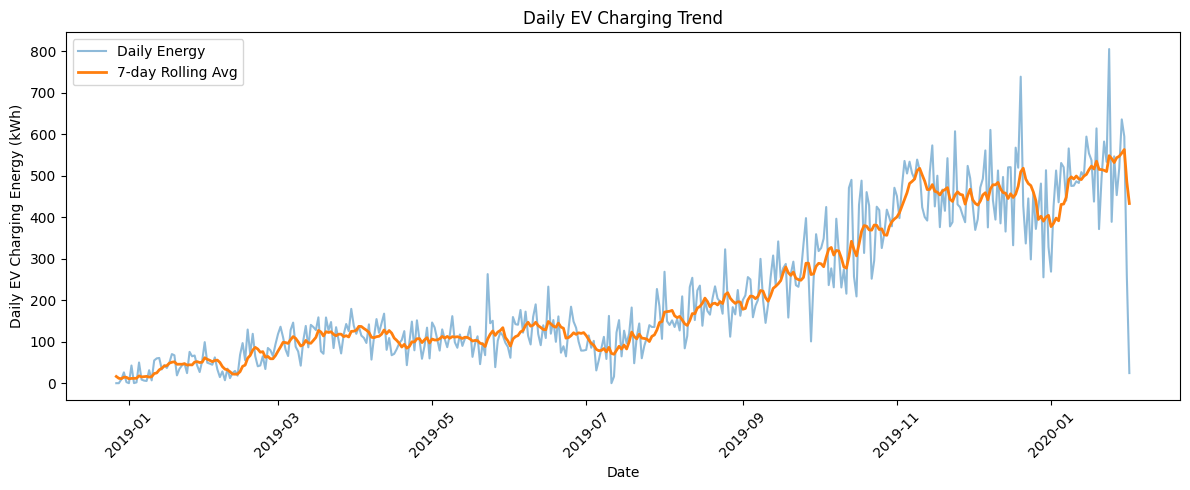

In [111]:
plt.figure(figsize=(12, 5))

plt.plot(
    daily_energy_df.index,
    daily_energy_df["total_energy"],
    alpha=0.5,
    label="Daily Energy"
)

plt.plot(
    daily_energy_df.index,
    daily_energy_df["rolling_7d"],
    linewidth=2,
    label="7-day Rolling Avg"
)


plt.xlabel("Date")
plt.ylabel("Daily EV Charging Energy (kWh)")
plt.title("Daily EV Charging Trend")

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [112]:
min_value = 1e-4
daily_energy_df.loc[
    daily_energy_df["total_energy"] == 0,
    "total_energy"
] = min_value

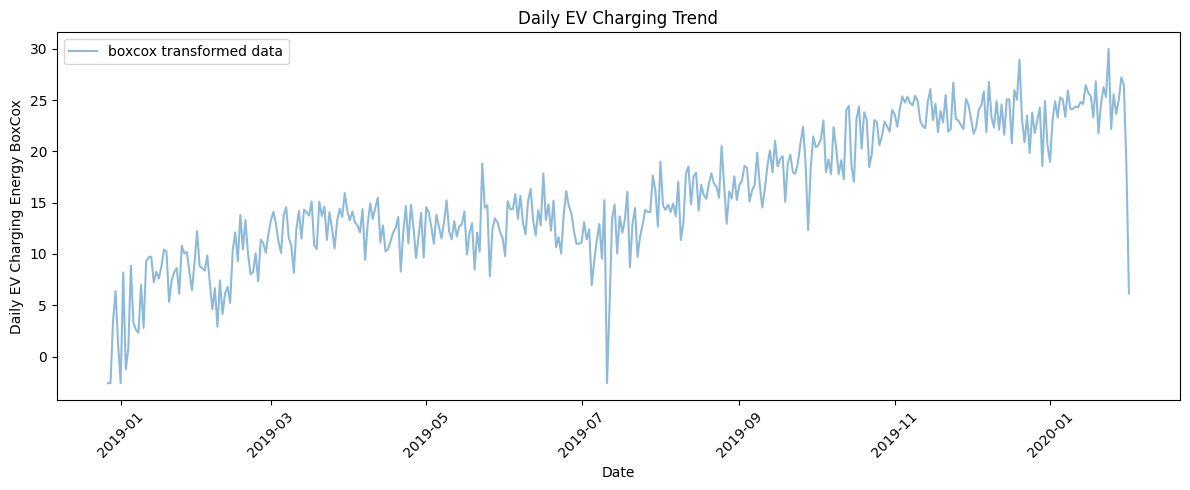

In [115]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

daily_energy_df = daily_energy_df.copy()

# make the target variance stationary
daily_energy_df["rolling_avg_boxcox"], lam = boxcox(daily_energy_df['total_energy'])

# plot the box-cox energy data
plt.figure(figsize=(12, 5))

plt.plot(
    daily_energy_df.index,
    daily_energy_df["rolling_avg_boxcox"],
    alpha=0.5,
    label='boxcox transformed data'
)

plt.xlabel("Date")
plt.ylabel("Daily EV Charging Energy BoxCox")
plt.title("Daily EV Charging Trend")

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [116]:
daily_energy_df['energy_diff'] = daily_energy_df['rolling_avg_boxcox'].diff()

In [117]:
daily_energy_df

,total_energy,rolling_7d,rolling_avg_boxcox,energy_diff
day,,,,
2018-12-27,0.0001,16.168571,-2.588828,NaN
2018-12-28,0.0001,11.734286,-2.588828,0.000000
2018-12-29,9.3000,10.840000,3.482540,6.071369
2018-12-30,26.0700,14.564286,6.377888,2.895347
2018-12-31,2.5900,14.177143,1.142996,-5.234892
...,...,...,...,...
2020-01-28,517.5700,546.455714,24.999019,1.346213
2020-01-29,635.3100,554.072857,27.203461,2.204442
2020-01-30,594.1300,562.802857,26.464043,-0.739419


In [118]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

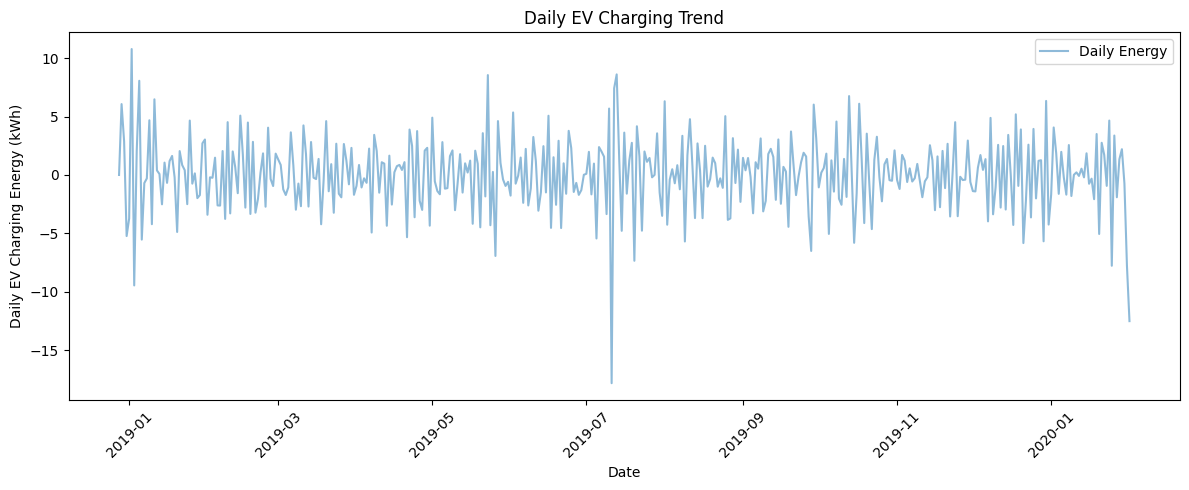

In [119]:
plt.figure(figsize=(12, 5))

plt.plot(
    daily_energy_df.index,
    daily_energy_df["energy_diff"],
    alpha=0.5,
    label="Daily Energy"
)

plt.xlabel("Date")
plt.ylabel("Daily EV Charging Energy (kWh)")
plt.title("Daily EV Charging Trend")

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [120]:
adfuller(daily_energy_df['energy_diff'].dropna())

(np.float64(-6.46005472984587),
 np.float64(1.450762559202639e-08),
 13,
 387,
 {'1%': np.float64(-3.447360865754795),
  '5%': np.float64(-2.8690374364690445),
  '10%': np.float64(-2.5707639493486636)},
 np.float64(1796.1253451834232))

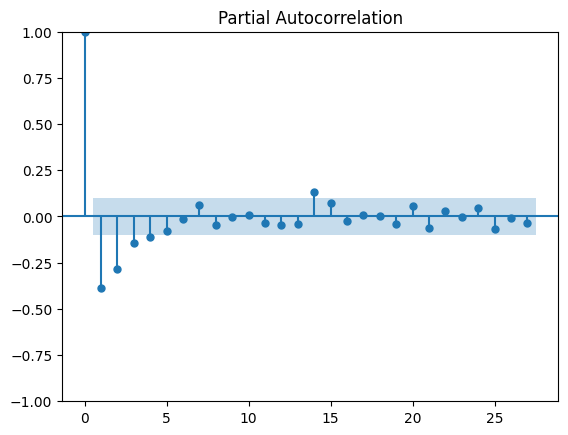

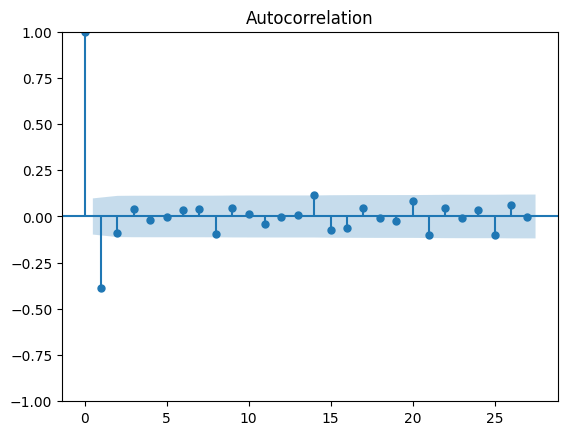

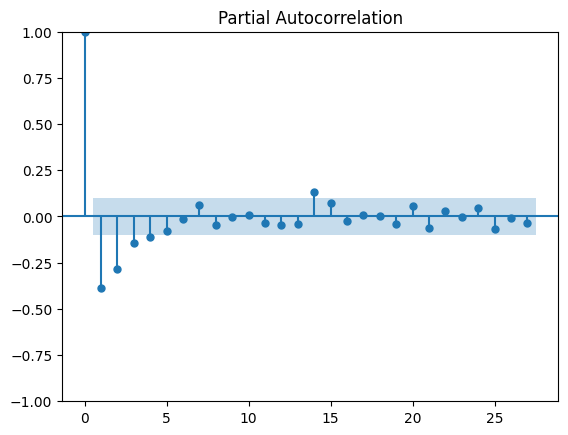

In [121]:
plot_acf(daily_energy_df['energy_diff'].dropna())
plot_pacf(daily_energy_df['energy_diff'].dropna())

In [122]:
daily_energy_df['rolling_avg_boxcox']

day
2018-12-27    -2.588828
2018-12-28    -2.588828
2018-12-29     3.482540
2018-12-30     6.377888
2018-12-31     1.142996
                ...    
2020-01-28    24.999019
2020-01-29    27.203461
2020-01-30    26.464043
2020-01-31    18.675969
2020-02-01     6.152487
Name: rolling_avg_boxcox, Length: 402, dtype: float64

In [123]:
train_size = int(len(daily_energy_df) * 0.80)
train, test = daily_energy_df.iloc[:train_size], daily_energy_df.iloc[train_size:]

In [135]:
model = ARIMA(train['rolling_avg_boxcox'], order = (14,1,14)).fit()

/home/surajad97/smartcharge-analytics/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/surajad97/smartcharge-analytics/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/surajad97/smartcharge-analytics/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/surajad97/smartcharge-analytics/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/surajad9

In [136]:
boxcox_forecast = model.forecast(steps=len(test))
y_pred = inv_boxcox(boxcox_forecast, lam)
y_pred

2019-11-13    473.734095
2019-11-14    439.610194
2019-11-15    451.965632
2019-11-16    508.429151
2019-11-17    474.639726
                 ...    
2020-01-28    446.204111
2020-01-29    444.777518
2020-01-30    456.064302
2020-01-31    464.568858
2020-02-01    466.195678
Freq: D, Name: predicted_mean, Length: 81, dtype: float64

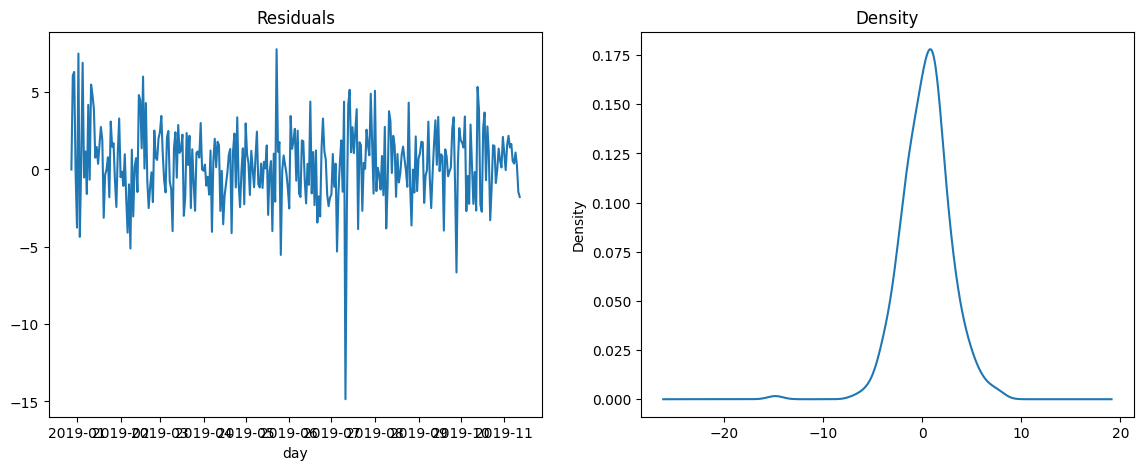

In [132]:
residuals = model.resid[1:]
fig, ax  = plt.subplots(1,2, figsize = (14, 5))
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1])
plt.show()

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [137]:
mae = mean_absolute_error(test['rolling_7d'], y_pred)
rmse = np.sqrt(mean_squared_error(test['rolling_7d'], y_pred))

mae, rmse

(39.06828282990404, np.float64(46.940410710452596))

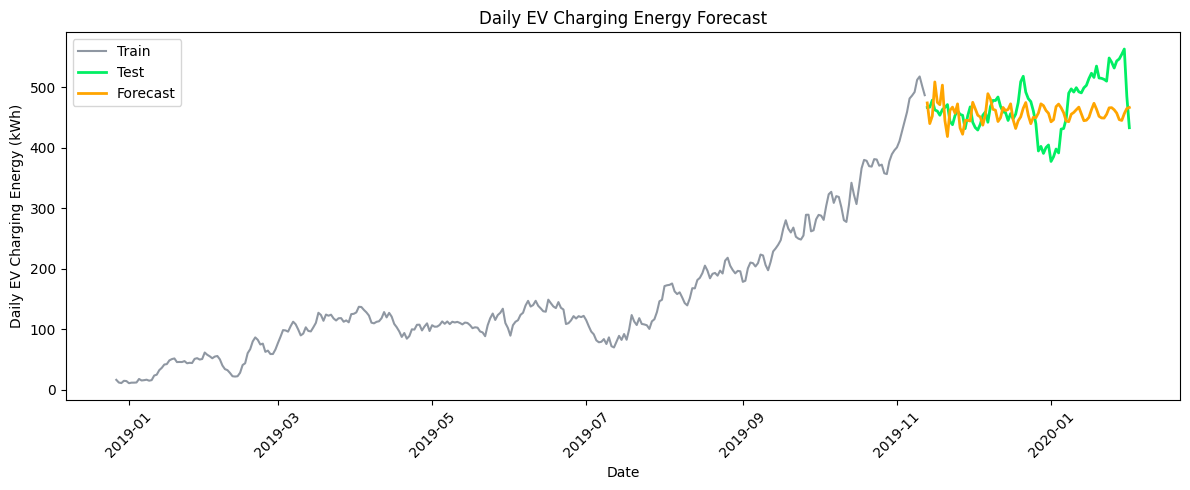

In [138]:
plt.figure(figsize=(12, 5))

plt.plot(
    train['rolling_7d'].index,
    train['rolling_7d'].values,
    alpha=0.5,
    color='#203147',
    label="Train",
)

plt.plot(
    test['rolling_7d'].index,
    test['rolling_7d'].values,
    linewidth=2,
    label='Test',
    color='#01ef63'
)

plt.plot(
    test['rolling_7d'].index,
    y_pred,
    linewidth=2,
    label='Forecast',
    color = 'orange'
)

# # confidence interval
# plt.fill_between(
#     conf_int.index,
#     conf_int.iloc[:, 0],
#     conf_int.iloc[:, 1],
#     alpha=0.3,
#     label="95% CI"
# )

plt.xlabel("Date")
plt.ylabel("Daily EV Charging Energy (kWh)")
plt.title("Daily EV Charging Energy Forecast")

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [139]:
boxcox_forecast = model.forecast(steps=7)
y_pred = inv_boxcox(boxcox_forecast, lam)
y_pred

2019-11-13    473.734095
2019-11-14    439.610194
2019-11-15    451.965632
2019-11-16    508.429151
2019-11-17    474.639726
2019-11-18    470.771676
2019-11-19    503.164349
Freq: D, Name: predicted_mean, dtype: float64